In [1]:
import json
import time
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from numpy import newaxis
from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [2]:
from math import pi,sqrt,exp,pow,log
from numpy.linalg import det, inv
from abc import ABCMeta, abstractmethod
from sklearn import cluster

In [3]:
import statsmodels.api as sm 
import scipy.stats as scs
import scipy.optimize as sco
import scipy.interpolate as sci
from scipy import stats

In [4]:
df = pd.read_csv('new_data_articles_with_sentiment.csv',index_col=0)
df2=df.copy()
df2=pd.DataFrame(df2)
df2['company'].unique()

array(['FB', 'WMT', 'AAPL', 'MSFT', 'BA', 'JNJ', 'CSCO', 'TSLA', 'AMZN',
       'TWTR', 'CVS', 'DIS', 'XOM', 'GS', 'T', 'CME', 'AVGO', 'QCOM',
       'NVDA', 'WBA', 'AIG', 'BAC', 'V', 'VZ', 'GOOG', 'GOOGL', 'MAR',
       'FDX', 'GE', 'DAL', 'LUV', 'MRK', 'AAL', 'CMCSA', 'GM', 'NKE',
       'BIIB', 'TGT', 'MET', 'XRX', 'KR', 'SO', 'PFE', 'IBM', 'JPM',
       'PEP', 'TMO', 'CAT', 'WFC', 'UNH', 'EBAY', 'OXY', 'SLB', 'BLK',
       'NFLX', 'AMGN', 'TSN', 'LMT', 'COP', 'FCX', 'HPQ', 'MCD', 'KO',
       'ABBV', 'TMUS', 'KHC', 'INTC', 'ABT', 'GILD', 'CVX', 'MA', 'LLY',
       'CB', 'ALB', 'VLO', 'REGN', 'MPC', 'CBOE', 'UAL', 'F', 'VIAC'],
      dtype=object)

In [5]:
for i in range(df2['company'].unique().shape[0]):
    df = pd.read_csv('union/new_data_union_{}.csv'.format(df2['company'].unique()[i]))
    wsj_var=np.var(df.mean_compound)
    mu=0
    noise=0.1
    print(wsj_var)
    sigma_wsj=noise*wsj_var
    n=df.shape[0]
    df_noise=pd.DataFrame()
    df_noise['noise']=df['mean_compound']
    for J in range(0,n):
        df_noise['noise'][J]+=np.random.normal(mu,sigma_wsj)
    df_noise.to_csv('noise/new_price_{}.csv'.format(df2['company'].unique()[i]))

0.02707741950753632
0.015721359949298665
0.023976658329306785
0.0154101390483068
0.027490837776000098
0.020892127321933417
0.0034911648598385516
0.02341572757891059
0.02809883129877152
0.012962861846311865
0.006517385150377813
0.012402605103816536
0.01954557303634633
0.01954883611247454
0.011950494499164367
0.01381607006066249
0.0019138009907596729
0.01141417474836487
0.004584294589786731
0.005332162373753314
0.006203073259953637
0.007656102574654183
0.004373599079990108
0.002837757052946425
0.019173887913279182
0.019173887913279182
0.003952218465126743
0.005464863223275208
0.014630554886114394
0.009547061832072563
0.009320688651795894
0.017086145884351724
0.011055994482159404
0.00926808931418275
0.017689310036791483
0.009636119262308743
0.006660548749304467
0.004773897543320664
0.0037172218816607073
0.0025898850331049464
0.002773383115737644
0.003571453427174945
0.014411201075287778
0.008489419854959827
0.019275643077327435
0.0028038943490279133
0.003381212715675981
0.0031584638571260

In [6]:
dff = pd.DataFrame()
for i in range(df2['company'].unique().shape[0]):
    df_noise = pd.read_csv('noise/new_price_{}.csv'.format(df2['company'].unique()[i]))
    dff[df2['company'].unique()[i]] = df_noise['noise']

In [7]:
dff.to_csv('all.csv')

In [4]:
dff = pd.read_csv('all.csv')

In [5]:
dfn=pd.read_csv("new_price_noise0.csv",index_col=0)  

In [6]:
df_1n=pd.DataFrame()
df_1n['wsj']=dfn['noise']
df_1n['price']=dff['c']

In [7]:
split = (0.85)
sequence_length=10;
normalise= True
batch_size=100;
input_dim=82
input_timesteps=9
neurons=50
epochs=5
prediction_len=1
dense_output=1
drop_out=0

In [8]:
df1=df_1n
i_split = int(len(df1) * split)

In [9]:
dff.head

<bound method NDFrame.head of             FB       WMT      AAPL      MSFT        BA       JNJ      CSCO  \
0     0.001185 -0.000981 -0.002369 -0.002934  0.001151 -0.000855 -0.000212   
1    -0.002675  0.002029 -0.000964  0.001397 -0.000984  0.001415 -0.000546   
2    -0.005778  0.000112 -0.003618 -0.001658  0.003337 -0.001650 -0.000531   
3     0.000559  0.000152 -0.001615  0.003620 -0.000729 -0.002139  0.000251   
4    -0.000841  0.000831  0.002475 -0.000253  0.001875 -0.000177 -0.000189   
...        ...       ...       ...       ...       ...       ...       ...   
1359 -0.003504 -0.001035  0.002238 -0.002229  0.005979  0.418388  0.000616   
1360  0.003535 -0.002005 -0.000524 -0.001516 -0.000721  0.001937 -0.000202   
1361  0.401349 -0.000367 -0.001689 -0.000555 -0.005479  0.058504  0.000010   
1362  0.012575  0.190474 -0.269107  0.089930  0.009202  0.001089 -0.000125   
1363 -0.087673  0.390820  0.087323  0.099086 -0.326970 -0.441240 -0.000572   

          TSLA      AMZN      TWT

In [10]:
dff.shape

(1364, 82)

In [11]:
#cols = ['price','wsj']
data_train_1 = dff.values[:i_split]


In [12]:
data_train_1.shape

(1159, 82)

In [13]:
len_train  = len(data_train_1)
len_train_windows = None

In [14]:
data_windows = []
for i in range(len_train - sequence_length):
    data_windows.append(data_train_1[i:i+sequence_length])
data_windows = np.array(data_windows).astype(float)
  
window_data=data_windows
win_num=window_data.shape[0]
col_num=window_data.shape[2]

In [15]:
normalised_data = []
record_min=[]
record_max=[]

In [16]:
window_data.shape

(1149, 10, 82)

In [17]:
for win_i in range(0,win_num):
    normalised_window = []
    for col_i in range(col_num-1,col_num):#col_num):
        temp_col=window_data[win_i,:,col_i]
        temp_min=min(temp_col)
        if col_i==col_num-1:
            record_min.append(temp_min)#record min
        temp_col=temp_col-temp_min
        temp_max=max(temp_col)
        if col_i==col_num-1:
            record_max.append(temp_max)#record max
        temp_col=temp_col/temp_max
        normalised_window.append(temp_col)
    for col_i in range(0,col_num-1):
        temp_col=window_data[win_i,:,col_i]
        normalised_window.append(temp_col)
    normalised_window = np.array(normalised_window).T
    normalised_data.append(normalised_window)
normalised_data=np.array(normalised_data)

In [18]:
data_windows=normalised_data
x_train1 = data_windows[:, :-1]
y_train1 = data_windows[:, -1,[-1]]
print('x_train1.shape',x_train1.shape)
print('y_train1.shape',y_train1.shape)

x_train1.shape (1149, 9, 82)
y_train1.shape (1149, 1)


In [19]:
record_min

[128.0,
 128.0,
 126.0,
 125.65,
 125.65,
 122.05,
 121.6,
 121.6,
 121.6,
 121.6,
 116.83,
 116.83,
 116.83,
 116.83,
 116.83,
 116.83,
 116.83,
 116.83,
 116.83,
 116.83,
 115.85,
 107.9,
 107.9,
 107.9,
 107.9,
 107.9,
 107.9,
 107.9,
 107.9,
 107.9,
 107.9,
 108.51,
 108.51,
 112.6,
 115.38,
 115.38,
 115.38,
 115.62,
 115.62,
 115.62,
 116.82,
 118.0,
 118.3,
 119.2757,
 119.2757,
 119.2757,
 120.71,
 121.07,
 122.6,
 122.9,
 122.9,
 124.62,
 126.26,
 126.26,
 127.37,
 127.34,
 126.9,
 126.2,
 126.2,
 126.2,
 126.2,
 126.2,
 126.2,
 126.2,
 126.2,
 126.2,
 126.2,
 126.77,
 126.77,
 126.77,
 127.71,
 127.75,
 129.47,
 130.23,
 130.23,
 130.23,
 130.23,
 130.23,
 130.23,
 130.41,
 130.75,
 130.75,
 130.9,
 130.9,
 130.9,
 130.9,
 130.9,
 130.9,
 130.9,
 131.0,
 128.29,
 127.39,
 127.39,
 127.39,
 127.39,
 127.39,
 127.39,
 126.39,
 126.25,
 126.25,
 126.25,
 126.25,
 126.25,
 126.25,
 126.25,
 126.25,
 126.25,
 126.25,
 126.85,
 127.41,
 129.37,
 129.37,
 129.37,
 129.37,
 129.37,
 

In [20]:
x_train_t=x_train1
print(x_train_t.shape)
x_train=x_train_t

(1149, 9, 82)


In [21]:
y_train_t=y_train1
print(y_train_t.shape)
y_train=y_train_t

(1149, 1)


In [22]:
dataframe= pd.read_csv("all.csv")
# dataframe.columns=['date','wsj','price']
# cols = ['price','wsj']
len_dataframe=dataframe.shape[0]

In [23]:
i_split = int(len(dataframe) * split)
data_test  = dataframe.values[i_split:]

In [24]:
len_test   = len(data_test)
len_train_windows = None

In [25]:
print('data_test.shape',data_test.shape)

data_test.shape (205, 82)


In [26]:
data_windows = []
for i in range(len_test - sequence_length):
    data_windows.append(data_test[i:i+sequence_length])

In [27]:
data_windows = np.array(data_windows).astype(float)

In [28]:
y_test_ori = data_windows[:, -1, [-1]]
print('y_test_ori.shape',y_test_ori.shape)

y_test_ori.shape (195, 1)


In [29]:
data_windows.shape

(195, 10, 82)

In [30]:
y_test_ori

array([[146.82  ],
       [149.55  ],
       [153.98  ],
       [178.3   ],
       [184.39  ],
       [206.8   ],
       [239.4   ],
       [215.85  ],
       [196.2   ],
       [174.85  ],
       [189.35  ],
       [195.3   ],
       [194.2   ],
       [189.25  ],
       [194.95  ],
       [185.66  ],
       [187.8   ],
       [185.51  ],
       [175.3   ],
       [174.19  ],
       [169.51  ],
       [191.68  ],
       [180.74  ],
       [181.45  ],
       [181.1   ],
       [187.1   ],
       [179.34  ],
       [180.77  ],
       [173.25  ],
       [178.35  ],
       [177.3   ],
       [182.9   ],
       [186.28  ],
       [178.5   ],
       [176.33  ],
       [174.85  ],
       [179.2   ],
       [179.12  ],
       [176.55  ],
       [174.15  ],
       [170.15  ],
       [170.7   ],
       [165.5   ],
       [163.1   ],
       [157.95  ],
       [162.29  ],
       [164.96  ],
       [175.6   ],
       [172.    ],
       [170.07  ],
       [178.4   ],
       [180.39  ],
       [175.

In [31]:
window_data=data_windows
win_num=window_data.shape[0]
col_num=window_data.shape[2]
normalised_data = []
record_min=[]
record_max=[]

In [32]:
for win_i in range(0,win_num):
    normalised_window = []
    for col_i in range(col_num-1,col_num):#col_num):
        temp_col=window_data[win_i,:,col_i]
        temp_min=min(temp_col)
        if col_i==col_num-1:
            record_min.append(temp_min)#record min
        temp_col=temp_col-temp_min
        temp_max=max(temp_col)
        if col_i==col_num-1:
            record_max.append(temp_max)#record max
        temp_col=temp_col/temp_max
        normalised_window.append(temp_col)
    for col_i in range(0,col_num-1):
        temp_col=window_data[win_i,:,col_i]
        normalised_window.append(temp_col)
    normalised_window = np.array(normalised_window).T
    normalised_data.append(normalised_window)
normalised_data=np.array(normalised_data)

In [33]:
data_windows=normalised_data#get_test_data
x_test = data_windows[:, :-1]
y_test = data_windows[:, -1, [0]]
print('x_test.shape',x_test.shape)
print('y_test.shape',y_test.shape)

x_test.shape (195, 9, 82)
y_test.shape (195, 1)


In [34]:
y_test

array([[0.73089358],
       [0.71709234],
       [0.89115914],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.74562541],
       [0.53337654],
       [0.30276518],
       [0.44296049],
       [0.48372746],
       [0.29976762],
       [0.22308288],
       [0.31138652],
       [0.16746708],
       [0.31585366],
       [0.49929742],
       [0.02200489],
       [0.        ],
       [0.        ],
       [0.87146226],
       [0.44143082],
       [0.46933962],
       [0.52277853],
       [0.79341452],
       [0.44339197],
       [0.50789355],
       [0.16869644],
       [0.39873703],
       [0.21975041],
       [0.6967509 ],
       [0.94079422],
       [0.37906137],
       [0.22238267],
       [0.12279355],
       [0.45663853],
       [0.45049885],
       [0.14873141],
       [0.        ],
       [0.        ],
       [0.03409795],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.20423529],
       [0.33112896],
       [0.948

LSTM MODEL

In [35]:
model = Sequential()
model.add(LSTM(neurons, input_shape=(input_timesteps, input_dim), return_sequences = True))
model.add(Dropout(drop_out))
model.add(LSTM(neurons,return_sequences = True))
model.add(LSTM(neurons,return_sequences =False))
model.add(Dropout(drop_out))
model.add(Dense(dense_output, activation='linear'))
# Compile model
model.compile(loss='mean_squared_error',
                optimizer='adam')
# Fit the model
model.fit(x_train,y_train,epochs=50,batch_size=batch_size)

Train on 1149 samples
Epoch 1/50
1149/1149 [==============================] - 4s 3ms/sample - loss: 0.0027
Epoch 2/50
1149/1149 [==============================] - 0s 41us/sample - loss: 0.0025
Epoch 3/50
1149/1149 [==============================] - 0s 42us/sample - loss: 0.0025
Epoch 4/50
1149/1149 [==============================] - 0s 41us/sample - loss: 0.0025
Epoch 5/50
1149/1149 [==============================] - 0s 42us/sample - loss: 0.0025
Epoch 6/50
1149/1149 [==============================] - 0s 42us/sample - loss: 0.0024
Epoch 7/50
1149/1149 [==============================] - 0s 40us/sample - loss: 0.0024
Epoch 8/50
1149/1149 [==============================] - 0s 43us/sample - loss: 0.0024
Epoch 9/50
1149/1149 [==============================] - 0s 41us/sample - loss: 0.0024
Epoch 10/50
1149/1149 [==============================] - 0s 41us/sample - loss: 0.0024
Epoch 11/50
1149/1149 [==============================] - 0s 40us/sample - loss: 0.0025
Epoch 12/50
1149/1149 [========

ulti sequence predict

In [36]:
data=x_test
prediction_seqs = []
window_size=sequence_length
pre_win_num=int(len(data)/prediction_len)

In [37]:
for i in range(0,pre_win_num):
    curr_frame = data[i*prediction_len]
    predicted = []
    for j in range(0,prediction_len):
        temp=model.predict(curr_frame[newaxis,:,:])[0]
        predicted.append(temp)
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-2], predicted[-1], axis=0)
    prediction_seqs.append(predicted)

e_predicted

In [38]:
de_predicted=[]
len_pre_win=int(len(data)/prediction_len)
len_pre=prediction_len
print(len_pre_win)
print(len_pre)

195
1


In [39]:
record_min

[119.8501,
 131.3,
 131.3,
 133.49,
 137.26,
 137.26,
 144.7,
 146.82,
 146.82,
 146.82,
 149.55,
 153.98,
 174.85,
 174.85,
 174.85,
 174.85,
 174.85,
 174.85,
 174.85,
 174.19,
 169.51,
 169.51,
 169.51,
 169.51,
 169.51,
 169.51,
 169.51,
 169.51,
 169.51,
 169.51,
 173.25,
 173.25,
 173.25,
 173.25,
 173.25,
 173.25,
 173.25,
 173.25,
 174.85,
 174.15,
 170.15,
 170.15,
 165.5,
 163.1,
 157.95,
 157.95,
 157.95,
 157.95,
 157.95,
 157.95,
 157.95,
 157.95,
 157.95,
 157.95,
 162.29,
 164.96,
 169.95,
 169.51,
 169.51,
 167.79,
 167.79,
 167.79,
 167.79,
 167.79,
 167.79,
 167.79,
 167.79,
 167.79,
 167.79,
 168.08,
 159.94,
 159.94,
 158.63,
 158.63,
 158.63,
 158.63,
 158.63,
 158.63,
 158.63,
 156.8,
 156.26,
 150.25,
 147.0,
 147.0,
 147.0,
 147.0,
 147.0,
 147.0,
 147.0,
 147.0,
 147.0,
 147.0,
 158.1,
 160.0,
 160.0,
 160.0,
 160.0,
 160.0,
 160.0,
 160.0,
 162.39,
 162.39,
 162.39,
 162.39,
 160.1,
 153.91,
 149.05,
 147.15,
 144.38,
 144.38,
 144.38,
 144.38,
 144.38,
 144.3

In [40]:
m=0
for i in range(0,len_pre_win):
    for j in range(0,len_pre):
        de_predicted.append(prediction_seqs[i][j][0]*record_max[m]+record_min[m])
        m=m+1
print(de_predicted)

[125.21654973036796, 132.55821577031168, 131.95515655847268, 134.24421160623433, 137.88616699088365, 139.2339760782942, 146.66215572487562, 148.27226710963993, 147.80032296588644, 146.56558585169725, 148.55478562228382, 155.9231227828562, 177.8398792134598, 178.06733115892857, 179.66364548653362, 178.33698851522058, 175.29200280122458, 174.69562355100643, 174.96963821041862, 174.14721188154536, 169.2810283076018, 169.28100124835967, 169.26075774878262, 169.25629245281218, 169.29058645911513, 169.40772519665305, 169.49437759568565, 169.70613154971971, 169.6045807172358, 169.33168496574274, 172.89535404892638, 173.13780843159185, 173.0502269688528, 172.98834142135456, 172.9882018561475, 173.15318973638583, 173.18876415831502, 173.2368439699558, 174.91054930926765, 174.30404936008156, 170.65010224876926, 170.96960781175645, 166.25709801651539, 164.11061621829867, 158.55233259573578, 157.4457763585262, 155.4257404439896, 156.6427888020873, 157.6140031158924, 160.05430473051965, 159.5244485

In [48]:
np.save('multi_sentiment.npy',de_predicted)

In[18]:

In [41]:
error = []
diff=y_test.shape[0]-prediction_len*pre_win_num

In [42]:
for i in range(y_test_ori.shape[0]-diff):
    error.append(y_test_ori[i,] - de_predicted[i])
    
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val) 
    absError.append(abs(val))

In [43]:
error_percent=[]
for i in range(len(error)):
    val=absError[i]/y_test_ori[i,]
    val=abs(val)
    error_percent.append(val)

In [44]:
mean_error_percent=sum(error_percent) / len(error_percent)
accuracy=1-mean_error_percent

In [45]:
MSE=sum(squaredError) / len(squaredError)

In [46]:
print("MSE",MSE)
print('accuracy',accuracy)
print('mean_error_percent',mean_error_percent)

MSE [358.88198455]
accuracy [0.93583555]
mean_error_percent [0.06416445]


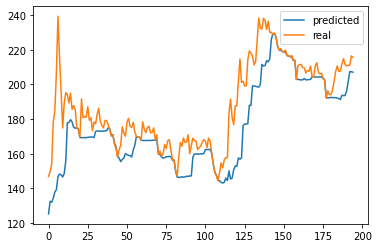

In [53]:
import matplotlib.pyplot as plt
plt.plot(de_predicted, label = 'predicted')
plt.plot(y_test_ori, label = 'real')
plt.legend()

plot

In [54]:
no_sen = np.load('no_senti.npy')
single_sen = np.load('single_senti.npy')
multi_sen = np.load('multi_sentiment.npy')

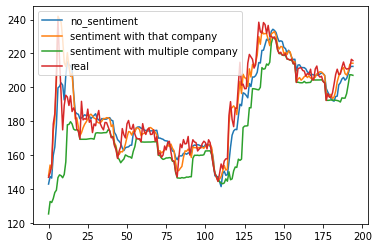

In [56]:
plt.plot(no_sen, label = 'no_sentiment')
plt.plot(single_sen, label = 'sentiment with that company')
plt.plot(multi_sen, label = 'sentiment with multiple company')
plt.plot(y_test_ori, label = 'real')
plt.legend()